In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from scipy import stats
import os

Подключаем библиотеки.

In [2]:
os.chdir(r'C:\Users\ммм\Desktop\CSC\Анализ данных\Lect_11\Задачи для лабораторной 4\Nursing Home Data')
data = pd.read_excel("nursing home data edited.xlsx")

Задаем рабочую папку и импортируем данные. Заметим, что изначально с данными нельзя было работать - столбцы были не на одном уровне, разные отступы. Поэтому была выполнена обработка данных, после чего данные были записаны в файл "nursing home data edited.xlsx".

In [3]:
data.head()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
0,244,128,385,23521,5230,5334,0
1,59,155,203,9160,2459,493,1
2,120,281,392,21900,6304,6115,0
3,120,291,419,22354,6590,6346,0
4,120,238,363,17421,5362,6225,0


In [4]:
print(data)

    BED  MCDAYS  TDAYS  PCREV  NSAL  FEXP  RURAL
0   244     128    385  23521  5230  5334      0
1    59     155    203   9160  2459   493      1
2   120     281    392  21900  6304  6115      0
3   120     291    419  22354  6590  6346      0
4   120     238    363  17421  5362  6225      0
5    65     180    234  10531  3622   449      1
6   120     306    372  22147  4406  4998      1
7    90     214    305  14025  4173   966      1
8    96     155    169   8812  1955  1260      0
9   120     133    188  11729  3224  6442      1
10   62     148    192   8896  2409  1236      0
11  120     274    426  20987  2066  3360      1
12  116     154    321  17655  5946  4231      0
13   59     120    164   7085  1925  1280      1
14   80     261    284  13089  4166  1123      1
15  120     338    375  21453  5257  5206      1
16   80      77    133   7790  1988  4443      1
17  100     204    318  18309  4156  4585      1
18   60      97    213   8872  1914  1675      1
19  110     178    2

Убеждаемся, что с данными все в порядке.

In [5]:
x = data[data['RURAL'] == 0]['NSAL']
y = data[data['RURAL'] == 1]['NSAL']

Задача выполняется для первого варианта, поэтому будем сравнивать годовой оклад медсестер в городских больницах (далее в лабораторной работе x) и загородных больницах (далее в лабораторной работе y).

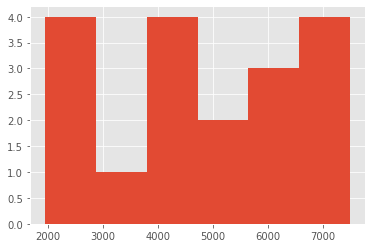

In [6]:
plt.hist(x, bins=6);

Проверим гипотезу о нормальности распределения x критерием Шапиро-Уилка.

In [7]:
stats.shapiro(x)[1]

0.26659053564071655

p-value оказался больше уровня значимости  $\alpha = 0.05$ , поэтому не отвергаем гипотезу о нормальности распределения x.

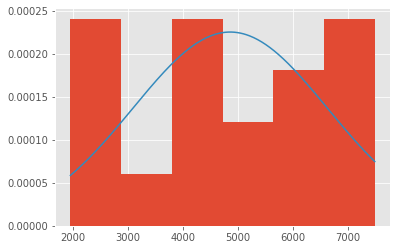

In [8]:
x_1 = np.linspace(np.min(x), np.max(x), 300)
pd.Series(x).hist(bins=6, density=1)
plt.plot(x_1, stats.norm.pdf(x_1, np.mean(x), np.std(x)));

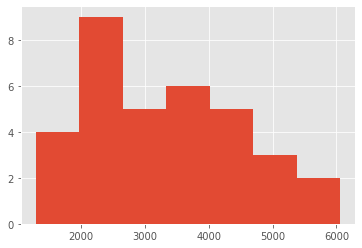

In [9]:
plt.hist(y, bins=7);

Для y, аналогично, распределение похоже на нормальное. Проверим гипотезу о нормальности критерием Шапиро-Уилка.

In [10]:
stats.shapiro(y)[1]

0.0717819407582283

p-value оказался больше уровня значимости $𝛼=0.05$, поэтому не отвергаем гипотезу о нормальности распределения y.

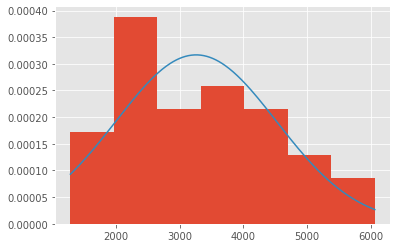

In [11]:
y_1 = np.linspace(np.min(y), np.max(y), 300)
pd.Series(y).hist(bins=7, density=1)
plt.plot(y_1, stats.norm.pdf(y_1, np.mean(y), np.std(y)));

По смыслу задачи, так как распределения x и y нормальные, мы имеем право выдвенуть следующую нулевую гипотезу: средний годовой оклад медсестер в городских больницах и больницах за городом равен. Другими словами, проверим гипотезу о равенстве средних значений x и y. Также, дополнительно проверим гипотезу о равенстве дисперсий значений x и y критерием Флингера-Килина.

In [12]:
print(stats.ttest_ind(x,y)[1])
print(stats.fligner(x,y)[1])
print(np.mean(x))
print(np.mean(y))

0.0005409523097389856
0.05254860862708049
4859.5
3258.705882352941


Таким образом, в критерии равенства средних p-value оказался значительно меньше уровня значимости  $\alpha = 0.05$, поэтому отвергаем гипотезу о равенстве средних x и y, в критерии Флингера-Килина о равенстве дисперсий p-value чуть больше уровня значимости $\alpha = 0.05$, поэтому не отвергаем гипотезу о равенстве дисперсий x и y.
Другими словами, средний годовой оклад медсестер в городе больше, чем средний годовой оклад медсестер за городом - проиллюстрировано на ящиковой диаграмме снизу.

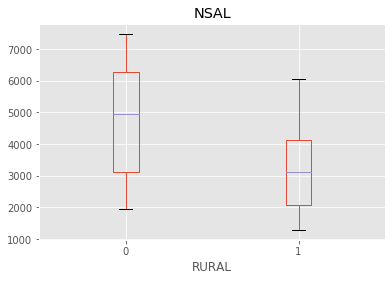

In [13]:
bp = data.boxplot(column='NSAL', by='RURAL')
bp.get_figure().suptitle('');

Вывод: в ходе лабораторной работы была выявлена следующая тенденция в годовом окладе медсестер: средний годовой оклад медсестры в городской больнице больше, чем средний годовой оклад медсестры в больнице, расположенной за городом, о чем свидетельствует ящиковая диаграмма.